#### Forecasting Using FbProphet

In [45]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df=pd.read_csv('call_volume.csv')

In [47]:
df.head()

,Unnamed: 0,Date,No_calls_Offered,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin,prec
0,0,2012-01-01,656.327485,2012,52,1,6,1,1,1,1,8.3,52.966183,31.492754,0.021546
1,1,2012-01-02,8645.284667,2012,1,2,0,1,1,0,1,8.3,44.632850,24.748793,0.017488
2,2,2012-01-03,9667.400761,2012,1,3,1,1,1,0,0,8.3,43.567307,21.399038,0.002933
3,3,2012-01-04,6235.026275,2012,1,4,2,1,0,0,0,8.3,49.716347,24.235577,0.012837
4,4,2012-01-05,2084.112419,2012,1,5,3,1,0,0,0,8.3,56.605770,29.653847,0.001346


In [48]:
df.tail()

,Unnamed: 0,Date,No_calls_Offered,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin,prec
2733,2733,2019-12-05,701.799898,2019,49,5,3,12,0,0,0,3.6,52.969246,33.216850,0.006538
2734,2734,2019-12-06,3264.984916,2019,49,6,4,12,0,0,0,3.6,50.789425,32.579353,0.043558
2735,2735,2019-12-07,3215.080467,2019,49,7,5,12,0,1,0,3.6,51.098550,32.100520,0.064155
2736,2736,2019-12-08,3652.727905,2019,49,8,6,12,0,1,0,3.6,52.875860,34.108242,0.032126
2737,2737,2019-12-09,3093.672937,2019,50,9,0,12,0,0,0,3.6,52.595665,34.512096,0.178889


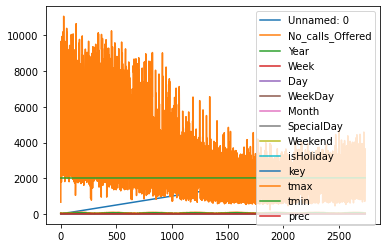

In [49]:
df.plot()

In [50]:
df.drop('Year',axis=1)
df.drop('Week',axis=1)
df.drop('Day',axis=1)
df.drop('WeekDay',axis=1)
df.drop('SpecialDay',axis=1)
df.drop('Weekend',axis=1)
df.drop('isHoliday',axis=1)
df.drop('key',axis=1)
df.drop('tmax',axis=1)
df.drop('tmin',axis=1)
df.drop('prec',axis=1)


,Unnamed: 0,Date,No_calls_Offered,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin
0,0,2012-01-01,656.327485,2012,52,1,6,1,1,1,1,8.3,52.966183,31.492754
1,1,2012-01-02,8645.284667,2012,1,2,0,1,1,0,1,8.3,44.632850,24.748793
2,2,2012-01-03,9667.400761,2012,1,3,1,1,1,0,0,8.3,43.567307,21.399038
3,3,2012-01-04,6235.026275,2012,1,4,2,1,0,0,0,8.3,49.716347,24.235577
4,4,2012-01-05,2084.112419,2012,1,5,3,1,0,0,0,8.3,56.605770,29.653847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2733,2019-12-05,701.799898,2019,49,5,3,12,0,0,0,3.6,52.969246,33.216850
2734,2734,2019-12-06,3264.984916,2019,49,6,4,12,0,0,0,3.6,50.789425,32.579353
2735,2735,2019-12-07,3215.080467,2019,49,7,5,12,0,1,0,3.6,51.098550,32.100520
2736,2736,2019-12-08,3652.727905,2019,49,8,6,12,0,1,0,3.6,52.875860,34.108242


In [51]:
df.head()

,Unnamed: 0,Date,No_calls_Offered,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin,prec
0,0,2012-01-01,656.327485,2012,52,1,6,1,1,1,1,8.3,52.966183,31.492754,0.021546
1,1,2012-01-02,8645.284667,2012,1,2,0,1,1,0,1,8.3,44.632850,24.748793,0.017488
2,2,2012-01-03,9667.400761,2012,1,3,1,1,1,0,0,8.3,43.567307,21.399038,0.002933
3,3,2012-01-04,6235.026275,2012,1,4,2,1,0,0,0,8.3,49.716347,24.235577,0.012837
4,4,2012-01-05,2084.112419,2012,1,5,3,1,0,0,0,8.3,56.605770,29.653847,0.001346


In [52]:
df.columns = ['Unnamed:','ds','y','Year','Week','Day',"WeekDay",'Month','SpecialDay','Weekend','isHoliday','key','tmax','tmin','prec']
df.head()

,Unnamed:,ds,y,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin,prec
0,0,2012-01-01,656.327485,2012,52,1,6,1,1,1,1,8.3,52.966183,31.492754,0.021546
1,1,2012-01-02,8645.284667,2012,1,2,0,1,1,0,1,8.3,44.632850,24.748793,0.017488
2,2,2012-01-03,9667.400761,2012,1,3,1,1,1,0,0,8.3,43.567307,21.399038,0.002933
3,3,2012-01-04,6235.026275,2012,1,4,2,1,0,0,0,8.3,49.716347,24.235577,0.012837
4,4,2012-01-05,2084.112419,2012,1,5,3,1,0,0,0,8.3,56.605770,29.653847,0.001346


In [53]:
df.tail()

,Unnamed:,ds,y,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin,prec
2733,2733,2019-12-05,701.799898,2019,49,5,3,12,0,0,0,3.6,52.969246,33.216850,0.006538
2734,2734,2019-12-06,3264.984916,2019,49,6,4,12,0,0,0,3.6,50.789425,32.579353,0.043558
2735,2735,2019-12-07,3215.080467,2019,49,7,5,12,0,1,0,3.6,51.098550,32.100520,0.064155
2736,2736,2019-12-08,3652.727905,2019,49,8,6,12,0,1,0,3.6,52.875860,34.108242,0.032126
2737,2737,2019-12-09,3093.672937,2019,50,9,0,12,0,0,0,3.6,52.595665,34.512096,0.178889


In [54]:
df['ds'] = pd.to_datetime(df['ds'])

In [55]:
df.head()

,Unnamed:,ds,y,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin,prec
0,0,2012-01-01,656.327485,2012,52,1,6,1,1,1,1,8.3,52.966183,31.492754,0.021546
1,1,2012-01-02,8645.284667,2012,1,2,0,1,1,0,1,8.3,44.632850,24.748793,0.017488
2,2,2012-01-03,9667.400761,2012,1,3,1,1,1,0,0,8.3,43.567307,21.399038,0.002933
3,3,2012-01-04,6235.026275,2012,1,4,2,1,0,0,0,8.3,49.716347,24.235577,0.012837
4,4,2012-01-05,2084.112419,2012,1,5,3,1,0,0,0,8.3,56.605770,29.653847,0.001346


In [56]:
df.tail()

,Unnamed:,ds,y,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin,prec
2733,2733,2019-12-05,701.799898,2019,49,5,3,12,0,0,0,3.6,52.969246,33.216850,0.006538
2734,2734,2019-12-06,3264.984916,2019,49,6,4,12,0,0,0,3.6,50.789425,32.579353,0.043558
2735,2735,2019-12-07,3215.080467,2019,49,7,5,12,0,1,0,3.6,51.098550,32.100520,0.064155
2736,2736,2019-12-08,3652.727905,2019,49,8,6,12,0,1,0,3.6,52.875860,34.108242,0.032126
2737,2737,2019-12-09,3093.672937,2019,50,9,0,12,0,0,0,3.6,52.595665,34.512096,0.178889


In [57]:
from fbprophet import Prophet

In [58]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [59]:
# Initialize the Model
model=Prophet()

In [60]:
df.columns

Index(['Unnamed:', 'ds', 'y', 'Year', 'Week', 'Day', 'WeekDay', 'Month',
       'SpecialDay', 'Weekend', 'isHoliday', 'key', 'tmax', 'tmin', 'prec'],
      dtype='object')

In [61]:
df.dropna(axis=0,inplace=True)

In [62]:
df.head()

,Unnamed:,ds,y,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin,prec
0,0,2012-01-01,656.327485,2012,52,1,6,1,1,1,1,8.3,52.966183,31.492754,0.021546
1,1,2012-01-02,8645.284667,2012,1,2,0,1,1,0,1,8.3,44.632850,24.748793,0.017488
2,2,2012-01-03,9667.400761,2012,1,3,1,1,1,0,0,8.3,43.567307,21.399038,0.002933
3,3,2012-01-04,6235.026275,2012,1,4,2,1,0,0,0,8.3,49.716347,24.235577,0.012837
4,4,2012-01-05,2084.112419,2012,1,5,3,1,0,0,0,8.3,56.605770,29.653847,0.001346


In [63]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [65]:
df.tail()

,Unnamed:,ds,y,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin,prec
2733,2733,2019-12-05,701.799898,2019,49,5,3,12,0,0,0,3.6,52.969246,33.216850,0.006538
2734,2734,2019-12-06,3264.984916,2019,49,6,4,12,0,0,0,3.6,50.789425,32.579353,0.043558
2735,2735,2019-12-07,3215.080467,2019,49,7,5,12,0,1,0,3.6,51.098550,32.100520,0.064155
2736,2736,2019-12-08,3652.727905,2019,49,8,6,12,0,1,0,3.6,52.875860,34.108242,0.032126
2737,2737,2019-12-09,3093.672937,2019,50,9,0,12,0,0,0,3.6,52.595665,34.512096,0.178889


In [66]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [67]:
future_dates.tail()

,ds
3098,2020-12-04
3099,2020-12-05
3100,2020-12-06
3101,2020-12-07
3102,2020-12-08


In [68]:
prediction=model.predict(future_dates)

In [69]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,6812.874137,2300.947412,6253.686007,6812.874137,6812.874137,-2601.884184,-2601.884184,-2601.884184,-1574.035822,-1574.035822,-1574.035822,-1027.848362,-1027.848362,-1027.848362,0.0,0.0,0.0,4210.989953
1,2012-01-02,6811.412529,4770.107863,8699.911630,6811.412529,6811.412529,-202.909919,-202.909919,-202.909919,788.163673,788.163673,788.163673,-991.073593,-991.073593,-991.073593,0.0,0.0,0.0,6608.502610
2,2012-01-03,6809.950921,4724.812618,8621.769058,6809.950921,6809.950921,-263.719682,-263.719682,-263.719682,679.950016,679.950016,679.950016,-943.669698,-943.669698,-943.669698,0.0,0.0,0.0,6546.231238
3,2012-01-04,6808.489312,4352.767057,8312.657272,6808.489312,6808.489312,-456.730627,-456.730627,-456.730627,429.607381,429.607381,429.607381,-886.338008,-886.338008,-886.338008,0.0,0.0,0.0,6351.758686
4,2012-01-05,6807.027704,4539.689784,8237.026593,6807.027704,6807.027704,-431.024016,-431.024016,-431.024016,388.932371,388.932371,388.932371,-819.956388,-819.956388,-819.956388,0.0,0.0,0.0,6376.003688


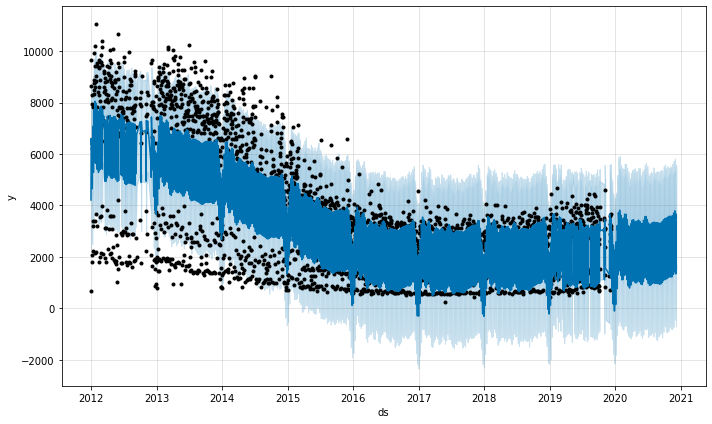

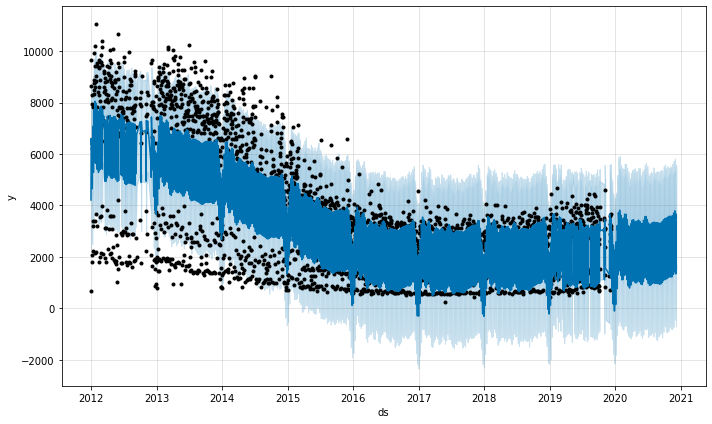

In [70]:
### plot the predicted projection
model.plot(prediction)

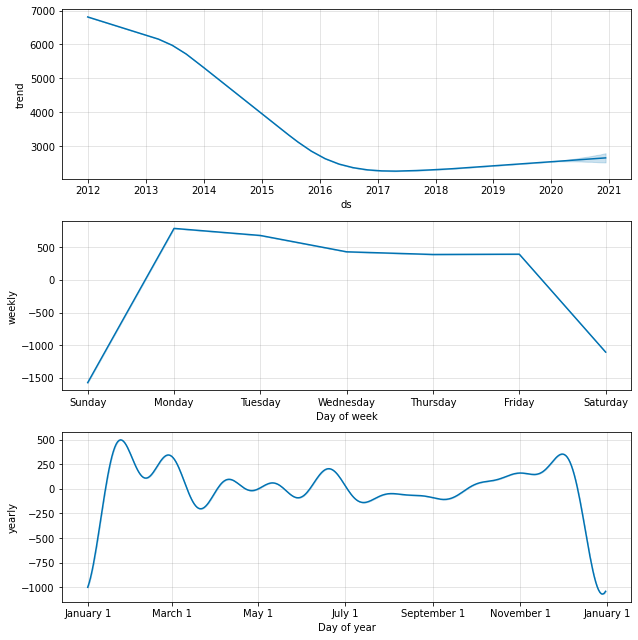

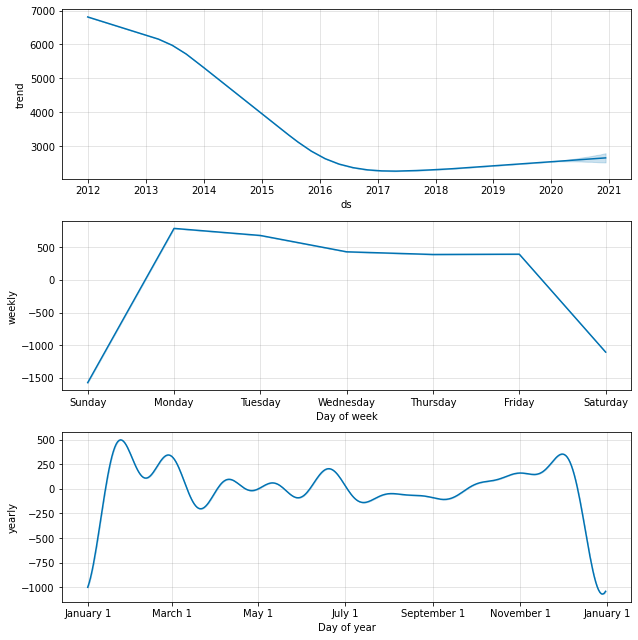

In [71]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [72]:
df.head()

,Unnamed:,ds,y,Year,Week,Day,WeekDay,Month,SpecialDay,Weekend,isHoliday,key,tmax,tmin,prec
0,0,2012-01-01,656.327485,2012,52,1,6,1,1,1,1,8.3,52.966183,31.492754,0.021546
1,1,2012-01-02,8645.284667,2012,1,2,0,1,1,0,1,8.3,44.632850,24.748793,0.017488
2,2,2012-01-03,9667.400761,2012,1,3,1,1,1,0,0,8.3,43.567307,21.399038,0.002933
3,3,2012-01-04,6235.026275,2012,1,4,2,1,0,0,0,8.3,49.716347,24.235577,0.012837
4,4,2012-01-05,2084.112419,2012,1,5,3,1,0,0,0,8.3,56.605770,29.653847,0.001346


In [73]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 11 forecasts with cutoffs between 2014-01-04 00:00:00 and 2018-12-09 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-05,1358.420899,-1405.062227,4146.176863,1939.638930,2014-01-04
1,2014-01-06,5682.407492,2885.015710,8609.296567,1353.688732,2014-01-04
2,2014-01-07,5396.113185,2447.559907,8223.903927,6536.899471,2014-01-04
3,2014-01-08,5512.427134,2731.285815,8396.476971,4655.727274,2014-01-04
4,2014-01-09,5708.381143,2790.815826,8680.989608,5887.075676,2014-01-04


In [74]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,2.101997e+06,1449.826471,1031.398804,0.543420,0.248938,0.908395
1,37 days,2.124743e+06,1457.649746,1039.861708,0.541486,0.248938,0.906076
2,38 days,2.141337e+06,1463.330677,1037.483200,0.540576,0.243113,0.905612
3,39 days,2.174471e+06,1474.608615,1040.644104,0.542144,0.237273,0.903061
4,40 days,2.147271e+06,1465.357044,1029.160291,0.538869,0.235798,0.903525


In [75]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,2.101997e+06,1449.826471,1031.398804,0.543420,0.248938,0.908395
1,37 days,2.124743e+06,1457.649746,1039.861708,0.541486,0.248938,0.906076
2,38 days,2.141337e+06,1463.330677,1037.483200,0.540576,0.243113,0.905612
3,39 days,2.174471e+06,1474.608615,1040.644104,0.542144,0.237273,0.903061
4,40 days,2.147271e+06,1465.357044,1029.160291,0.538869,0.235798,0.903525


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


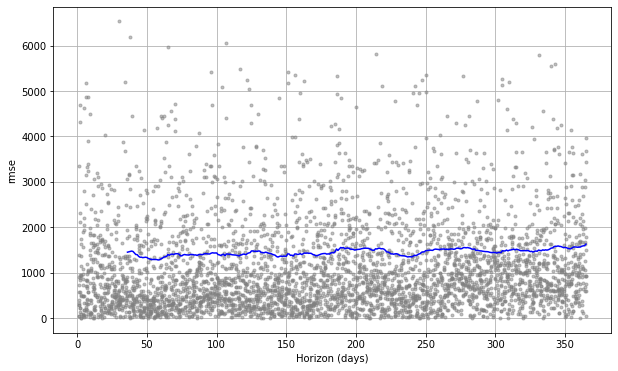

In [76]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')